## Data Preprocessing-Before Building machine Learning Model

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Read Dataset

In [9]:
df=pd.read_csv('bankloan2.csv')
df

,ID,Amount,Salary,Ratio,Age,Occupation,Property,Type,Outcome
0,1,245100,66400,3.69,44,industrial,farm,stb,repay
1,2,90600,75300,1.20,41,industrial,farm,stb,repay
2,3,195600,52100,3.75,37,industrial,farm,ftb,default
3,4,157800,67600,2.33,44,industrial,apartment,ftb,repay
4,5,150800,35800,4.21,39,professional,apartment,stb,default
5,6,133000,45300,2.94,29,industrial,farm,ftb,default
6,7,193100,73200,2.64,38,professional,house,ftb,repay
7,8,215000,77600,2.77,17,professional,farm,ftb,repay
8,9,83000,62500,1.33,30,professional,house,ftb,repay
9,10,186100,49200,3.78,30,industrial,house,ftb,default


In [8]:
#Head
df.head()

,ID,Amount,Salary,Ratio,Age,Occupation,Property,Type,Outcome
0,1,245100,66400,3.69,44,industrial,farm,stb,repay
1,2,90600,75300,1.20,41,industrial,farm,stb,repay
2,3,195600,52100,3.75,37,industrial,farm,ftb,default
3,4,157800,67600,2.33,44,industrial,apartment,ftb,repay
4,5,150800,35800,4.21,39,professional,apartment,stb,default


In [11]:
#Tail
df.tail()

,ID,Amount,Salary,Ratio,Age,Occupation,Property,Type,Outcome
20,21,154000,48900,3.15,49,professional,house,stb,repay
21,22,112800,79700,1.42,41,professional,house,ftb,repay
22,23,252000,59700,4.22,27,professional,house,stb,default
23,24,175200,39900,4.39,37,professional,apartment,stb,default
24,25,149700,58600,2.55,35,industrial,farm,stb,default


## Sanity check data

In [13]:
#Shape
df.shape

(25, 9)

In [15]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            25 non-null     int64  
 1     Amount      25 non-null     int64  
 2    Salary       25 non-null     int64  
 3    Ratio        25 non-null     float64
 4    Age          25 non-null     int64  
 5     Occupation  25 non-null     object 
 6      Property   25 non-null     object 
 7     Type        25 non-null     object 
 8     Outcome     25 non-null     object 
dtypes: float64(1), int64(4), object(4)
memory usage: 1.9+ KB


In [16]:
#Finding missing values
df.isnull().sum()

ID              0
  Amount        0
 Salary         0
 Ratio          0
 Age            0
  Occupation    0
   Property     0
  Type          0
  Outcome       0
dtype: int64

In [17]:
#Finding duplicate
df.duplicated().sum()

0

In [19]:
#Identifying garbage values
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

  Occupation
  industrial      13
  professional    12
Name: count, dtype: int64
******************************
   Property
   farm         8
 house          6
 apartment      4
   apartment    3
 farm           2
   house        2
Name: count, dtype: int64
******************************
  Type
       ftb    6
      ftb     5
       stb    4
  ftb         4
  stb         3
      stb     3
Name: count, dtype: int64
******************************
  Outcome
  repay      14
  default    11
Name: count, dtype: int64
******************************


## Exploratory Data Analysis

In [22]:
#Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,25.0,13.000,7.359801,1.0,7.00,13.00,19.00,25.0
Amount,25.0,179460.000,49808.332636,83000.0,150800.00,175200.00,210000.00,284100.0
Salary,25.0,59220.000,12880.670272,32300.0,52100.00,61100.00,66400.00,79700.0
Ratio,25.0,3.252,1.478222,1.2,2.46,3.15,3.87,8.8
Age,25.0,36.360,8.445314,17.0,30.00,37.00,43.00,51.0


In [23]:
df.describe(include="object")

,Occupation,Property,Type,Outcome
count,25,25,25,25
unique,2,6,6,2
top,industrial,farm,ftb,repay
freq,13,8,6,14


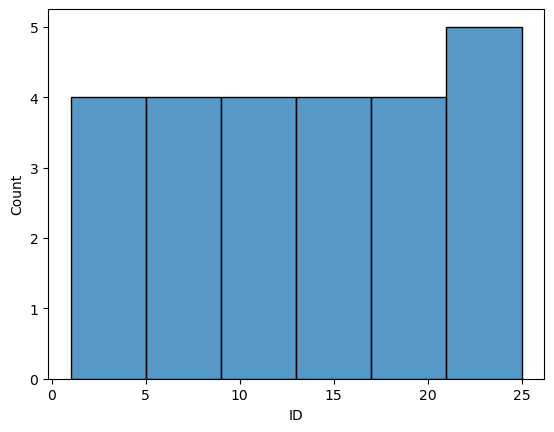

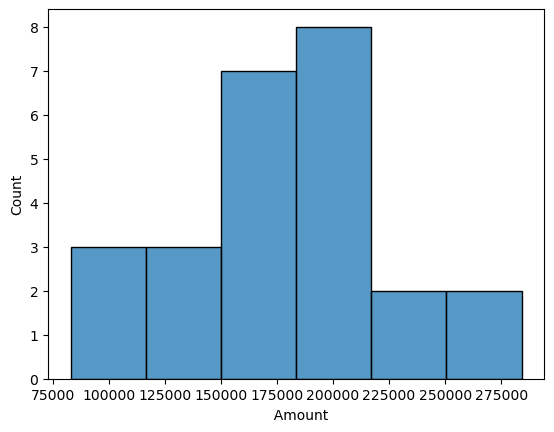

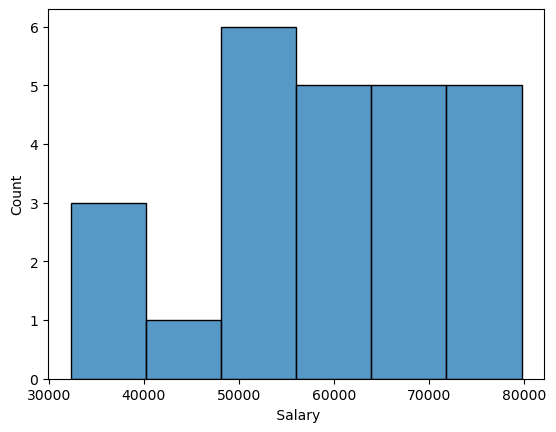

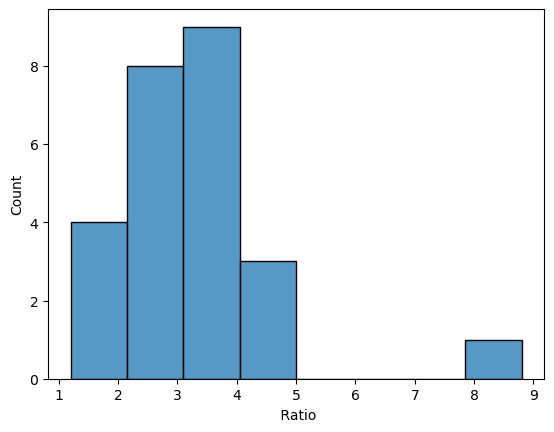

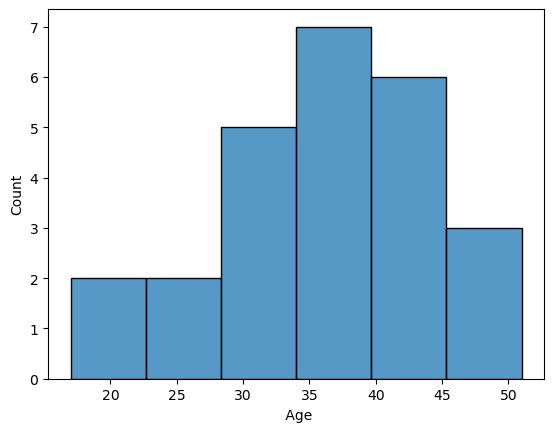

In [27]:
#Histogram to understand the distribution
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

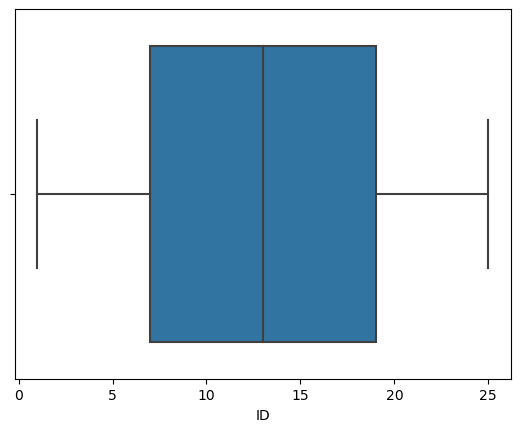

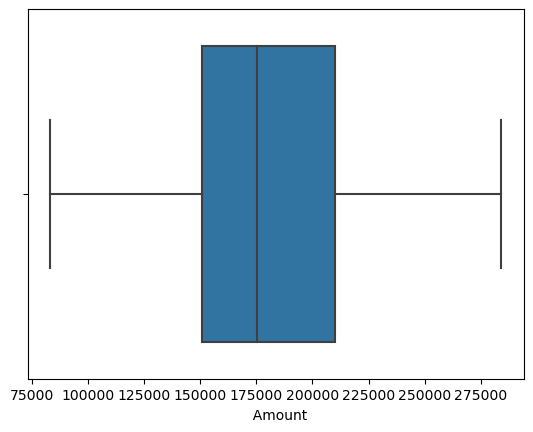

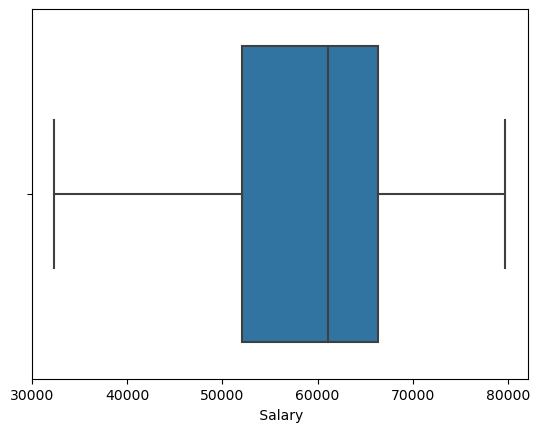

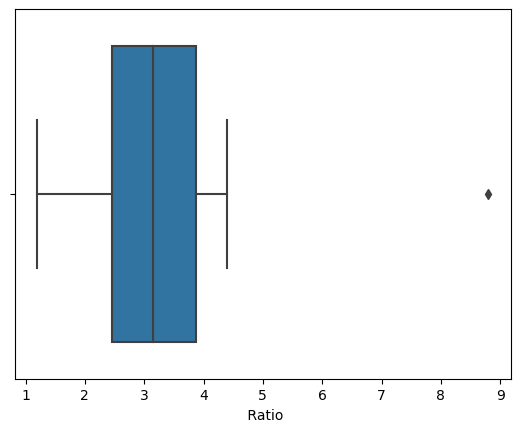

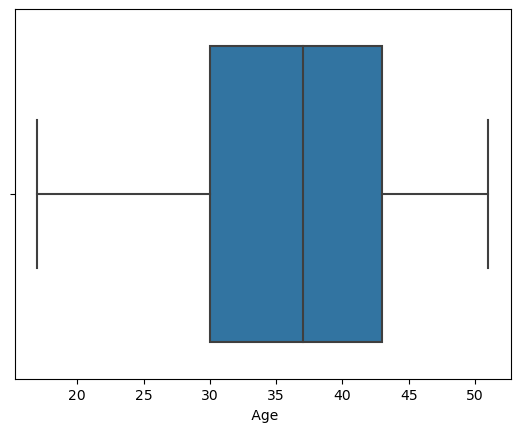

In [28]:
#Boxplotbto identifynoutliers
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [33]:
df.select_dtypes(include='number').corr()

,ID,Amount,Salary,Ratio,Age
ID,1.000000,0.183385,-0.129221,0.231094,0.050947
Amount,0.183385,1.000000,-0.235348,0.763533,0.139147
Salary,-0.129221,-0.235348,1.000000,-0.721346,-0.190014
Ratio,0.231094,0.763533,-0.721346,1.000000,0.305563
Age,0.050947,0.139147,-0.190014,0.305563,1.000000


## Outliers treatment

In [38]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw
    

In [35]:
df.columns


Index(['ID', '  Amount', ' Salary', ' Ratio', ' Age', '  Occupation',
       '   Property', '  Type', '  Outcome'],
      dtype='object')